# Midterm Project

* Author: Jordan Glendrange
* Date: 2021-10-31

# Research Question

The dataset we are working with are a results of a marketing campaign of a Portuguese banking institution. The goal of the call is to open an account. We are given a number of descriptive variables about the potential customer and whether or not they subscribed. The goal of this project is to determine which descriptive variable is the strongest correlated variable with the conversion. My hypothesis is that Age will be the strongest correlation.

# Import Dataset

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

In [100]:
df = pd.read_csv("bank-full.csv")

In [101]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


Reading in the file gives us a pretty messy dataframe. I think we need to first see how much cleaning we can do during the import process. 

In [102]:
df = pd.read_csv("bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


The file wasn't actually stored in a CSV format. It was using a semi-colon as a delimiter. We can specify the delimiter in the "read_csv" function and the dataframe comes back clean.

# Data Exploration

To begin data exploration I really like using the "describe" function on a dataframe. for me it's a sanity check on the data. I can go through each column and determine if the values make sense. For example if the average age is 2,000 I know something is wrong and I can investigate and do further cleaning. Here I use include=all because I want to see summary statistics for all variables and not just numbers.

In [103]:
df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


The first thing I notice is the count across each variable. Every variable has a count of 45,211. This means we don't have to worry about null values in our dataset. Next I want to look at the means to understand if the values make sense. Age is ~41 and balance ~ 1362 which sounds reasonable to me.

In [104]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [105]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

# Data Wrangling

#### Modify multiple column names - all of the column names are formatted correctly, but there are a few that aren't very descriptive. 

In [106]:
df = df.rename(columns={'y': 'subscribed', 'pdays': 'days_passed','poutcome': 'previous_outcome'})

In [107]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'days_passed',
 'previous',
 'previous_outcome',
 'subscribed']

#### Fix any missing invalid values in the data set - using the function isna() across all of our fields we can see there are no NaN values. In the cell below I have commented out the code I would have used if there were invalid values

In [108]:
df.isna().sum()

age                 0
job                 0
marital             0
education           0
default             0
balance             0
housing             0
loan                0
contact             0
day                 0
month               0
duration            0
campaign            0
days_passed         0
previous            0
previous_outcome    0
subscribed          0
dtype: int64

In [109]:
# df['fieldname'] = df['fieldname'].fillna('value')

#### Create new columns based on existing columns or calculations - Here Im going to create a field that concats day and month

In [110]:
df['day_month'] = df['day'].astype(str) + '-' + df['month'].astype(str)
df['day_month']

0         5-may
1         5-may
2         5-may
3         5-may
4         5-may
          ...  
45206    17-nov
45207    17-nov
45208    17-nov
45209    17-nov
45210    17-nov
Name: day_month, Length: 45211, dtype: object

#### Drop column(s) from your dataset.

In [111]:
df = df.drop(columns=['duration', 'days_passed', 'previous','previous_outcome'])

In [112]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'campaign',
 'subscribed',
 'day_month']

* Drop a row(s) from your dataset - I don't want to drop any rows from my dataset, but the code to drop rows by index is below

In [113]:
# df = df.drop([0,1])

#### Sort your data based on multiple variables.

In [114]:
df.sort_values(['age','balance']).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,subscribed,day_month
41273,18,student,single,unknown,no,3,no,no,cellular,25,aug,2,yes,25-aug
41252,18,student,single,secondary,no,5,no,no,cellular,24,aug,2,no,24-aug
41222,18,student,single,unknown,no,35,no,no,telephone,21,aug,2,no,21-aug
40744,18,student,single,unknown,no,108,no,no,cellular,10,aug,1,yes,10-aug
41487,18,student,single,unknown,no,108,no,no,cellular,8,sep,1,yes,8-sep


#### Filter your data based on some condition.

In [115]:
df[(df['age'] > 50) & (df['marital'] == 'single')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,subscribed,day_month
108,59,retired,single,secondary,no,30,yes,no,unknown,5,may,1,no,5-may
133,55,admin.,single,secondary,no,802,yes,yes,unknown,5,may,2,no,5-may
291,54,technician,single,unknown,no,447,yes,no,unknown,5,may,2,no,5-may
317,51,technician,single,secondary,no,0,yes,no,unknown,5,may,2,no,5-may
325,55,management,single,tertiary,no,115,no,no,unknown,5,may,4,no,5-may
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44375,53,admin.,single,secondary,no,2398,yes,no,cellular,2,aug,1,yes,2-aug
44725,51,management,single,tertiary,no,151,yes,no,cellular,8,sep,1,yes,8-sep
44862,54,services,single,secondary,no,0,no,no,cellular,23,sep,1,yes,23-sep
44922,54,blue-collar,single,secondary,no,1633,yes,no,unknown,4,oct,1,no,4-oct


#### Convert all the string values to upper or lower cases in one column.

In [116]:
df['marital'] = df['marital'].str.upper()
df['job'] = df['job'].str.lower()

In [117]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,subscribed,day_month
0,58,management,MARRIED,tertiary,no,2143,yes,no,unknown,5,may,1,no,5-may
1,44,technician,SINGLE,secondary,no,29,yes,no,unknown,5,may,1,no,5-may
2,33,entrepreneur,MARRIED,secondary,no,2,yes,yes,unknown,5,may,1,no,5-may
3,47,blue-collar,MARRIED,unknown,no,1506,yes,no,unknown,5,may,1,no,5-may
4,33,unknown,SINGLE,unknown,no,1,no,no,unknown,5,may,1,no,5-may


#### Check whether numeric values are present in a given column of your dataframe.

Here we use the function dtypes. It will tell us the data type of each column in our dataframe. Here we can see age, balance, day, and campaign are integers.

In [118]:
df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
campaign       int64
subscribed    object
day_month     object
dtype: object

#### Group your dataset by one column, and get the mean, min, and max values by group. 

In [119]:
df.groupby([
    'marital'
]).agg(
 {
     'age':[np.mean, np.max, np.min]
 }
).reset_index()

marital        age          
                  mean amax amin
0  DIVORCED  45.782984   95   24
1   MARRIED  43.408099   95   20
2    SINGLE  33.703440   86   18

## Data Visualization

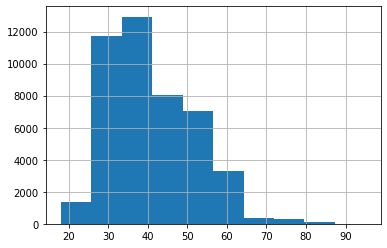

In [120]:
df['age'].hist()

Plot 1: I think it's important to look at different variables in a distribution. If the ages were skewed it may lead to biases in the data. We can use this plot to understand that the ages are almost a normal distribution. 

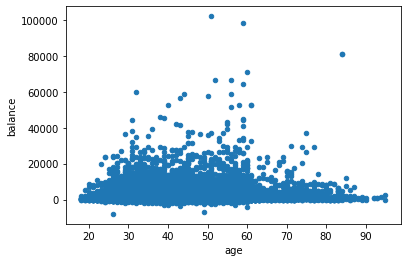

In [121]:
df.plot.scatter(x = 'age', y='balance')

Plot 2: I think scatter plots are great as a visual for representing the correlation between 2 variables. In this example I chose age and balance. I would suspect that the older someone is the larger the balance, as they have more time to accumulate wealth. This scatter plot does show a weak linear correlation with balances greater than 10,000 the age is more likely to be older.

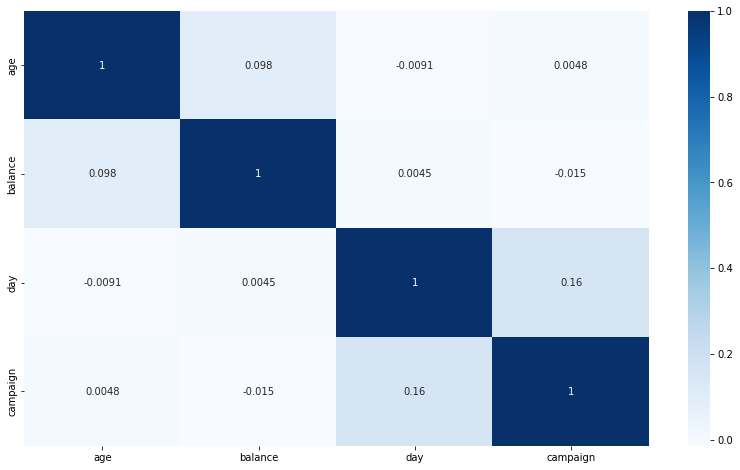

In [122]:
plt.figure(figsize=(14,8))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues")

* Plot 3: Here is a useful plot to actually visualize the correlation between all of you numeric variables

# Extra Analysis

In [123]:
df2 = df.drop(columns=['day','month','day_month'])

Here we are going to run a linear regression. I am doing some additional data wrangling to get the dataframe in the correct format. Step 1 is converting all binary fields to 0's and 1's. Next I use a function called get_dummies which explodes categorical columns into binary fields for each category.

In [125]:
df2['subscribed'] = np.where(df['subscribed']=='yes', 1, 0)


In [127]:
df2['loan'] = np.where(df['loan']=='yes', 1, 0)
df2['housing'] = np.where(df['housing']=='yes', 1, 0)
df2['default'] = np.where(df['default']=='yes', 1, 0)

In [129]:
X = pd.get_dummies(data=df2, drop_first=True)

In [140]:
X.columns = X.columns.str.replace("-", "_")
list(X.columns)

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'campaign',
 'subscribed',
 'job_blue_collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self_employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_MARRIED',
 'marital_SINGLE',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_telephone',
 'contact_unknown']

In [148]:
result = sm.ols(formula="subscribed ~ age + default + balance + housing + loan + campaign + job_blue_collar\
+ job_entrepreneur + job_housemaid + job_management + job_retired + job_self_employed + job_services +\
job_student + job_technician + job_unemployed + job_unknown + marital_MARRIED + marital_SINGLE\
+ education_secondary + education_tertiary + education_unknown", data=X).fit()

In [149]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             subscribed   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     96.13
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:58:30   Log-Likelihood:                -11800.
No. Observations:               45211   AIC:                         2.365e+04
Df Residuals:                   45188   BIC:                         2.385e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1539    

## Conclusion

After running a linear regression model on the data set we found that being a student was the variable the most positevly correlated with subscribing. The next step would be to train this model and test it's accuracy in order to predict whether or not someone is going to subscribe or not. 